# Analysis of Speech features as an Early Biomarker of Parkinson's Disease in REM Sleep Behaviour Disorder Patients

**Parkinson's Disease** is prevalent neurological disorder associated with **dysfunction of the basal ganglia**, an area of the brain responsible for the **initiation of movements**. There is a **significant loss of dopamine neurones** in the basal ganglia which are key for regulating movements and leads to severe disturbances in motor movements e.g. tremors and slowness of movements. 

**Speech** is extremely **sensitive to disturbances in the basal ganglia**, and more research has shown that up to 90% of Parkinson's patients develop speech abnormalities

This raises the question of <u>whether speech features can be used as a **potential biomarker** for the presence of neurodegeneration (loss of neurones) **before the manifestation of hallmark motor symptoms seen in Parkinson's.**<u>

This was explored by Hlavnička *et al.,* [1], whose group took a multitude of recordings from patients with **early untreated Parkinson's Disease (PD), REM sleep behaviour disorder (RBD) and Healthy controls (HC/control).**

It has been well known in the field that **RBD patients are at an extremely high risk for developing Parkinson's Disease**, and thus will provide a robust variable for <u> evaluating the effectiveness of speech features<u> to identify early neurodegeneration and therefore potential <u>early onset of Parkinson's Disease.<u>

A neurologist recorded and scored subjects on a variety of speech features collected from subjects  either reading a monologue about their lives (columns end with .1) and a phonectically balanced reading passage.

Acoustic speech features recorded were:
- Entropy  of  speech  timing  (-)
- Rate  of  speech  timing  (-/min)
- Acceleration  of  speech  timing  (-/min2)
- Duration  of  pause  intervals  (ms)
- Duration  of  voiced  intervals  (ms)
- Gaping  in-between  voiced  intervals  (-/min)
- Duration  of  unvoiced  stops  (ms)
- Decay  of  unvoiced  fricatives  (‰/min)
- Relative  loudness  of  respiration  (dB)
- Pause  intervals  per  respiration  (-)
- Rate  of  speech  respiration  (-/min)
- Latency  of  respiratory  exchange  (ms)

**AIM**: To predict a pattern of neurodegeneration in speech features of patients at high risk of developing Parkinson's Disease
    
## Methods

1. We will use **K-nearest neighbourhood classification** on combinations of speech features that are most distinct in Parkinson's patients and healthy controls. 
    
2. Then we will use our model to predict whether **REM behavioural disorder patients fall under the classification of healthy controls or PD patients**, thus indicating whether they show **potential signs of early Parkinson's Disease**

    
    
[1] Hlavnička, J., Čmejla, R., Tykalová, T. et al. Automated analysis of connected speech reveals early biomarkers of Parkinson’s disease in patients with rapid eye movement sleep behaviour disorder. Sci Rep 7, 12 (2017). https://doi.org/10.1038/s41598-017-00047-5







## Preprocessing Data

In [72]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns

#color palette set as Dark 3
sns.set_palette("Dark2", 3)

In [73]:
#Reading in the data and remove the '-' in the data and assign them as NA values
pddata = pd.read_csv("https://raw.githubusercontent.com/amyamin/Parkinsondisease_project/main/parkinsondata.csv",  na_values="-")
pddata

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56.0,2.0,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67.0,1.0,No,No,No,No,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67.0,1.0,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73.0,2.0,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60.0,0.7,No,No,No,No,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC46,69,M,NaN,NaN,NaN,No,No,No,No,...,8.43,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177
126,HC47,68,M,NaN,NaN,NaN,No,No,No,No,...,4.09,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138
127,HC48,53,M,NaN,NaN,NaN,No,No,No,No,...,5.09,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156
128,HC49,44,M,NaN,NaN,NaN,No,No,No,No,...,2.80,252,361,38.92,26.88,0.389,-17.53,4.0,17.51,154


In [74]:
#recode participant code into a disease status column
parkinsonian_status = []

for i, row in pddata.iterrows():
  # Check the value of each row in the column Participant code and assigns a new value in the column parkinson_status dependent on the condition.
    if row['Participant code'].startswith('PD'):
        parkinson_status = 'PD'
    elif row['Participant code'].startswith('RBD'):
        parkinson_status = 'RBD'
    else:
        parkinson_status = 'Control'
    parkinsonian_status.append(parkinson_status)
    
pddata['PD status'] = parkinsonian_status 

pddata

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1,PD status
0,PD01,58,F,No,56.0,2.0,No,No,No,No,...,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127,PD
1,PD02,68,F,No,67.0,1.0,No,No,No,No,...,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313,PD
2,PD03,68,M,No,67.0,1.0,No,No,No,No,...,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201,PD
3,PD04,75,M,No,73.0,2.0,No,No,No,No,...,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151,PD
4,PD05,61,M,Yes,60.0,0.7,No,No,No,No,...,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC46,69,M,NaN,NaN,NaN,No,No,No,No,...,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177,Control
126,HC47,68,M,NaN,NaN,NaN,No,No,No,No,...,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138,Control
127,HC48,53,M,NaN,NaN,NaN,No,No,No,No,...,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156,Control
128,HC49,44,M,NaN,NaN,NaN,No,No,No,No,...,252,361,38.92,26.88,0.389,-17.53,4.0,17.51,154,Control


**Removing columns**

Many measurments were taken that we aren't directly interested in for this analysis for example medication history. 

Indiviudal motor measurements were also collated e.g. hand movements and gait were scored. All of these measurements were summated and form the UPDRS III total. 

The Unified Parkinson's Disease Rating Scale ranges from 0 (representing no motor manifestation) to 108 (severe motor distortion)

In [75]:
parkinsondata = pddata.drop(columns= [' Age  (years) ','Gender',
       ' Positive  history  of  Parkinson  disease  in  family ',
       ' Age  of  disease  onset  (years) ',
       ' Duration  of  disease  from  first  symptoms  (years) ',
       ' Antidepressant  therapy ', ' Antiparkinsonian  medication ',
       ' Antipsychotic  medication ', ' Benzodiazepine  medication ',
       ' Levodopa  equivalent  (mg/day) ', ' Clonazepam  (mg/day) ', ' 18.  Speech ', ' 19.  Facial  Expression ',
       ' 20.  Tremor  at  Rest  -  head ', ' 20.  Tremor  at  Rest  -  RUE ',
       ' 20.  Tremor  at  Rest  -  LUE ', ' 20.  Tremor  at  Rest  -  RLE ',
       ' 20.  Tremor  at  Rest  -  LLE ',
       ' 21.  Action  or  Postural  Tremor  -  RUE ',
       ' 21.  Action  or  Postural  Tremor  -  LUE ',
       ' 22.  Rigidity  -  neck ', ' 22.  Rigidity  -  RUE ',
       ' 22.  Rigidity  -  LUE ', ' 22.  Rigidity  -  RLE ',
       ' 22.  Rigidity  -  LLE ', ' 23.Finger  Taps  -  RUE ',
       ' 23.Finger  Taps  -  LUE ', ' 24.  Hand  Movements  -  RUE ',
       ' 24.  Hand  Movements  -  LUE ',
       ' 25.  Rapid  Alternating  Movements  -  RUE ',
       ' 25.  Rapid  Alternating  Movements  -  LUE ',
       ' 26.  Leg  Agility  -  RLE ', ' 26.  Leg  Agility  -  LLE ',
       ' 27.  Arising  from  Chair   ', ' 28.  Posture ', ' 29.  Gait ',
       ' 30.  Postural  Stability ',
       ' 31.  Body  Bradykinesia  and  Hypokinesia ',' Overview  of  motor  examination:  Hoehn  &  Yahr  scale  (-) '])

In [76]:
#check of columns - ensure UPDRS (total sum of motor measurements) and All speech features are present
print(parkinsondata.columns)

Index(['Participant code',
       ' Overview  of  motor  examination:  UPDRS  III  total  (-) ',
       ' Entropy  of  speech  timing  (-) ',
       ' Rate  of  speech  timing  (-/min) ',
       ' Acceleration  of  speech  timing  (-/min2) ',
       ' Duration  of  pause  intervals  (ms) ',
       ' Duration  of  voiced  intervals  (ms) ',
       ' Gaping  in-between  voiced  intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) ',
       ' Decay  of  unvoiced  fricatives  (‰/min) ',
       ' Relative  loudness  of  respiration  (dB) ',
       ' Pause  intervals  per  respiration  (-) ',
       ' Rate  of  speech  respiration  (-/min) ',
       ' Latency  of  respiratory  exchange  (ms) ',
       ' Entropy  of  speech  timing  (-) .1',
       ' Rate  of  speech  timing  (-/min) .1',
       ' Acceleration  of  speech  timing  (-/min2) .1',
       ' Duration  of  pause  intervals  (ms) .1',
       ' Duration  of  voiced  intervals  (ms) .1',
       ' Gaping  in-between  voic

In [77]:
#determine the total number of subjects in each Parkinson's Disease status category
parkinsondata['PD status'].value_counts()

RBD        50
Control    50
PD         30
Name: PD status, dtype: int64

In [78]:
#Check the data, ensure all columns are present
parkinsondata

,Participant code,Overview of motor examination: UPDRS III total (-),Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),...,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1,PD status
0,PD01,8.0,1.564,354,6.05,146,264,58.65,31.38,-2.101,...,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127,PD
1,PD02,22.0,1.564,340,27.52,173,253,48.26,22.38,-1.745,...,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313,PD
2,PD03,19.0,1.550,211,11.97,377,322,47.54,38.12,2.657,...,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201,PD
3,PD04,24.0,1.519,140,-2.49,360,663,13.72,44.88,-0.934,...,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151,PD
4,PD05,54.0,1.543,269,6.72,211,328,42.90,47.12,-0.973,...,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC46,NaN,1.564,265,3.58,198,365,40.25,26.88,-1.872,...,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177,Control
126,HC47,NaN,1.547,291,6.31,183,359,39.59,31.37,-1.517,...,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138,Control
127,HC48,NaN,1.540,298,-13.66,177,283,53.01,50.50,-1.111,...,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156,Control
128,HC49,NaN,1.560,359,-2.44,169,256,50.68,17.88,-0.823,...,252,361,38.92,26.88,0.389,-17.53,4.0,17.51,154,Control


## Classification of motor symptoms

We will use the UPDRS III scores to indicate parkinsonian conditions.

Previous research has found that a score of >3 can indicate *initial parkinsonism*.

Therefore:
   - An UPDRS III **≤ 3** = **motor negative**
   - An UPDRS III **>3**  = **motor positive**

In [79]:
#classifying participants UPDRS score as either motor positive or motor negative
def check_pd_status(row):
    if row[' Overview  of  motor  examination:  UPDRS  III  total  (-) '] >= 3:
        return 'motor positive'
    else:
        return 'motor negative'

# Apply the function to the DataFrame and create a new 'motor symptom' column
parkinsondata['motor symptom'] = parkinsondata.apply(check_pd_status, axis=1)

#creates a total count for each condition: motor symptom and P
parkinsondata[['motor symptom', 'PD status']].value_counts()

motor symptom   PD status
motor negative  Control      50
motor positive  RBD          35
                PD           30
motor negative  RBD          15
dtype: int64

## Visualising the Data

From the above table we can see that:
 - 35 out of 50 RBD patients have motor **positive** symptoms
 - 15 out of 50 RBD patients have motor **negative** symptoms

We can visualise this using a histogram plot


[Text(0.5, 1.0, 'Figure 1')]

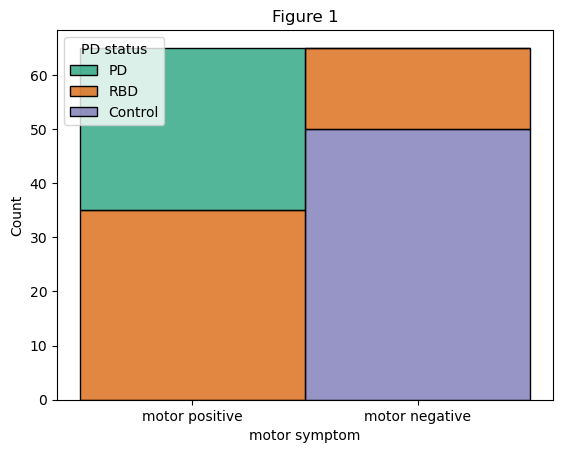

In [80]:
#Figure 1
sns.histplot(binwidth=0.5, x="motor symptom", hue="PD status", data=parkinsondata, stat ='count', multiple="stack").set(title= "Figure 1")

## Determining Speech Features to use as potential biomarkers

First we want to examine different speech features and determine whether there may be a difference between Parkinson's and control patients.

We will then find the best combination of features where there is the most distinctive speech pattern between PD patients and healthy controls.

Hlavnička *et al.,* [1] calculated these combinations which we will also use:
- Rate  of  speech  timing  (Monologue) and Duration  of  pause  intervals
- **Duration  of  pause  intervals and Duration  of  unvoiced  stops (Monologue)**


In [81]:
#we will remove RBD patients and create a refined dataset to initially explore combinations of speech features and later to run our model on
function = parkinsondata['PD status'] != 'RBD' #Function finds values in PD status that are not equal to RBD (we are only focussing on PD and control)
refineddata = parkinsondata.loc[function] #calls the function and creates a new dataset
refineddata['PD status'].value_counts() #total counts to check that numbers have not changed from before.

Control    50
PD         30
Name: PD status, dtype: int64

**Initial exploration of combinations of Speech features** 

Below in Figure 2A/B are the chosen combinations used by the Hlavnička group. 

*Try various combinations of speech features yourself!*

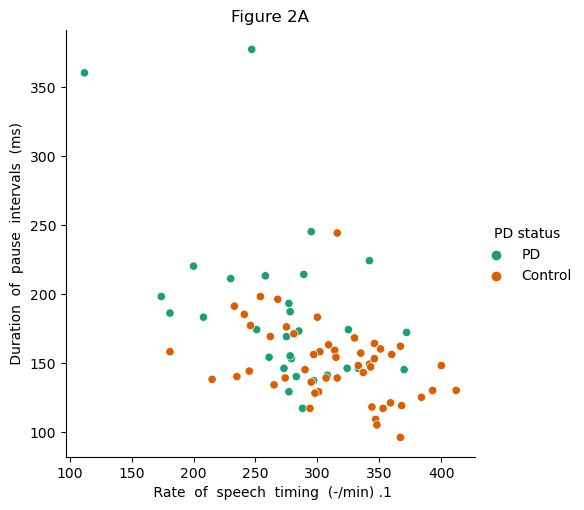

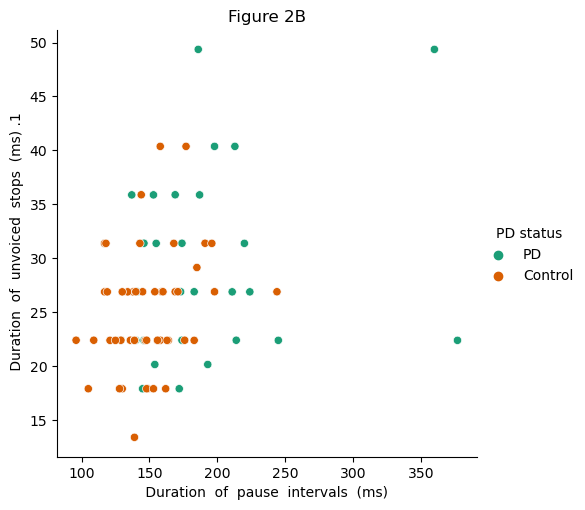

In [40]:
#Try some combinations of speech features yourself! 
sns.relplot(data=refineddata, x=' Rate  of  speech  timing  (-/min) .1', y=' Duration  of  pause  intervals  (ms) ', hue= 'PD status').set(title="Figure 2A")
sns.relplot(data=refineddata, x=' Duration  of  pause  intervals  (ms) ', y=' Duration  of  unvoiced  stops  (ms) .1', hue= 'PD status').set(title= "Figure 2B")

## K-Nearest Neighbourhoods Classification

Now that we have decided on our speech features, we are going to create a model using K-nearest neighbourhoods classification from the sci-kit learning package. This supervised learning algorithm works by classifying/categorising the data and uses the nearest data points (n_neighbours)

The KNeighborsClassifier has the n_neighbours set to 5, we will use GridSearchCV to test a dictionary of hyperparmater values and choose the best value for our model.


In [83]:
#our chosen speech features, if you have decided on your own then make sure to change X
X = refineddata[[' Duration  of  pause  intervals  (ms) ',' Duration  of  unvoiced  stops  (ms) .1']]
y = refineddata['PD status']

#Splitting the data - train_test_split function splits our data randomly with two sets: train and test.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.25, random_state=42)


In [84]:
#Choosing hyperparameters automatically using GridSearchCV, which calculates the most suitables n_neighbours, it then uses this value and will fit the model 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 40),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)})

In [85]:
model.score(test_X, test_y)

0.8

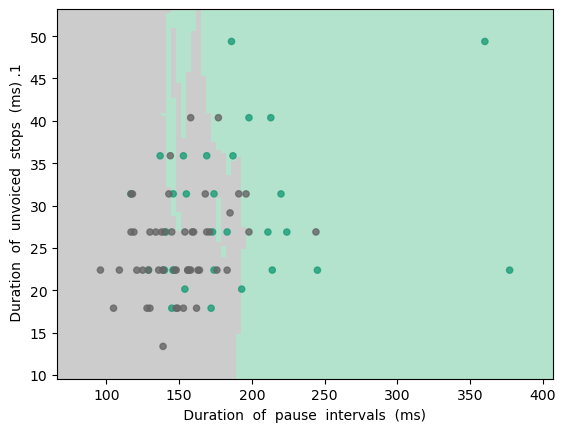

In [86]:
#Figure 3 visualising our model. Grey = healthy controls and dark green = PD.

from plot import plot_knn

plot_knn(model, X, y,)

## Model Prediction using RBD patients

We will now use our model to make a prediction of whether the RBD patients in this study may show potential signs of Parkinson's disease.

In [87]:
#Creating a new dataframe with only RBD patients and our relevant measurements
function2 = parkinsondata['PD status'] == 'RBD'
RBDdata = parkinsondata.loc[function2]
RBDdata = RBDdata.reset_index(drop=True) #this resets the index to 0

In [88]:
#make sure to change if you chose your own speech features
new_X = RBDdata[[' Duration  of  pause  intervals  (ms) ',' Duration  of  unvoiced  stops  (ms) .1']]

In [89]:
#here we are using new x values from our RBD subset of data and running it through our model to output predicted y values based off our KNN classification (Fig 3.)
y_pred = model.predict(new_X)

In [90]:
#creating a pandas dataframe from the numpy array generated from model.predict
predictedPD = pd.DataFrame(y_pred, columns=['Potential PD'])
predictedPD= predictedPD.reset_index(drop=True) #this resets the index to 0

In [91]:
#appending the new predicted column to our RBD subset of data
RBDdata['Potential PD'] = predictedPD['Potential PD']

## Visualising our Model

Now that we have generated a model and used it to predict the potential Parkinson Status of REM behaviour disorder patients, let's visualise our dataset

In [92]:
# need to change our x and y values to our original dataset that includes all patients
X = parkinsondata[[' Duration  of  pause  intervals  (ms) ',' Duration  of  unvoiced  stops  (ms) .1']]
y = parkinsondata['PD status']

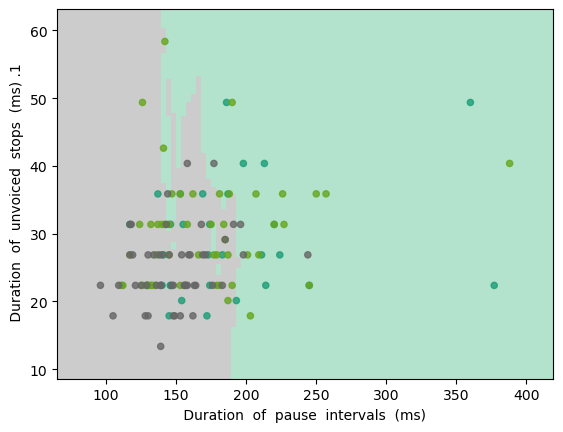

In [93]:
#Figure 4. Grey = control, Dark Green = PD, Light Green = RBD patients
plot_knn(model, X, y)

## Visualising RBD patient data after model classification

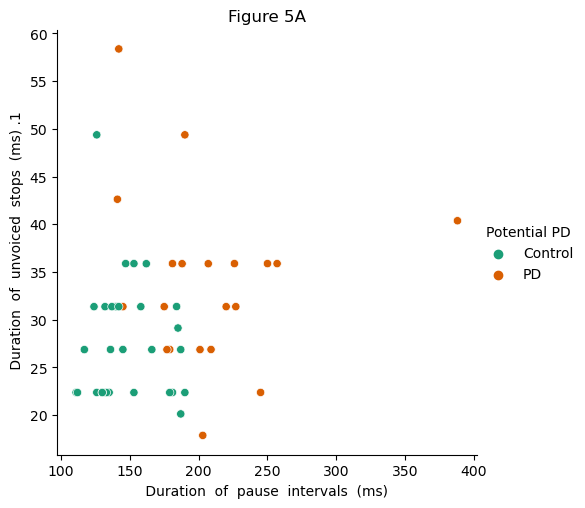

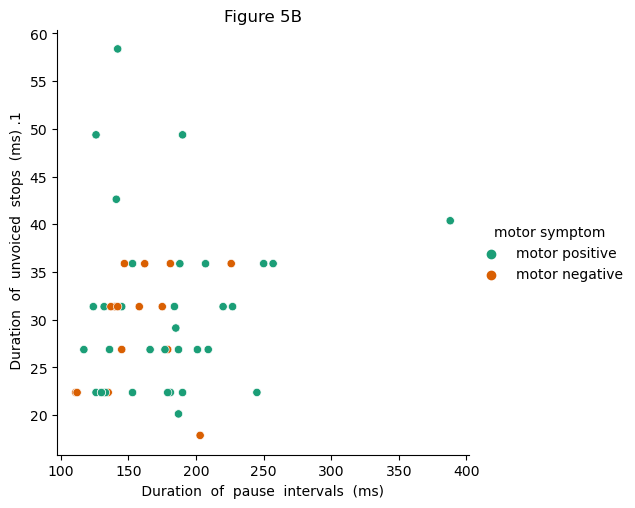

In [95]:
sns.relplot(data=RBDdata, x=' Duration  of  pause  intervals  (ms) ', y=' Duration  of  unvoiced  stops  (ms) .1', hue= 'Potential PD').set(title= "Figure 5A")
sns.relplot(data=RBDdata, x=' Duration  of  pause  intervals  (ms) ', y=' Duration  of  unvoiced  stops  (ms) .1', hue= 'motor symptom').set(title= "Figure 5B")

In [97]:
#total value counts for RBD patients 
RBDdata[['motor symptom', 'Potential PD']].value_counts()

motor symptom   Potential PD
motor positive  Control         20
                PD              15
motor negative  Control         10
                PD               5
dtype: int64

[Text(0.5, 1.0, 'Figure 6')]

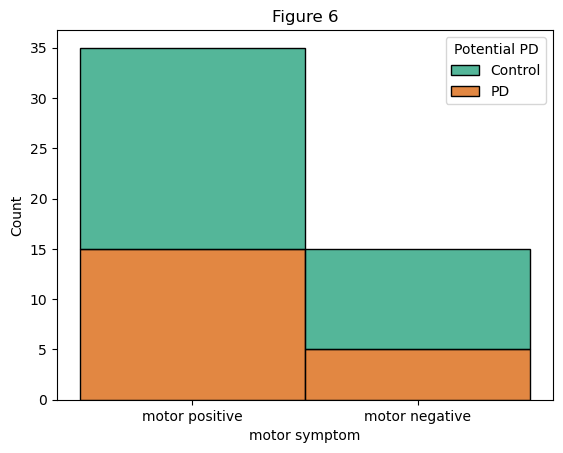

In [99]:
sns.histplot(binwidth=0.5, x="motor symptom", hue="Potential PD", data=RBDdata, stat ='count', multiple="stack").set(title= "Figure 6")

# <u>Summary<u>

- Here we generated a model that was able to predict whether REM behavioural disorder patients may show potential early signs of Parkinson's Disease (model accuracy of 0.8)
    
    
- We identified some speech features that are robust biomarkers for early detection of Parkinson's Disease e.g. duration of unvoiced stops and duration of paused intervals.


In [23]:
#our chosen speech features, if you have decided on your own then make sure to change X
X = parkinsondata[[' Duration  of  pause  intervals  (ms) ',' Duration  of  unvoiced  stops  (ms) .1']]
y = parkinsondata['PD status'].drop[

#Splitting the data - train_test_split function splits our data randomly with two sets: train and test.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.25, random_state=42)

SyntaxError: invalid syntax (2121177970.py, line 6)

In [ ]:
#Choosing hyperparameters automatically using GridSearchCV, which calculates the most suitables n_neighbours, it then uses this value and will fit the model 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y)

In [ ]:
model.score(test_X, test_y)

In [ ]:
plot_knn(model, X,y)